In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('deflategate.csv')
df

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45
5,Patriots,11.60,11.95
6,Patriots,11.85,12.30
7,Patriots,11.10,11.55
8,Patriots,10.95,11.35
9,Patriots,10.50,10.90


In [107]:
df['pressure'] = (df['Blakeman']+df['Prioleau'])/2
df.drop(columns=['Blakeman','Prioleau'],inplace=True)
df

,Team,pressure
0,Patriots,11.650
1,Patriots,11.025
2,Patriots,11.325
3,Patriots,10.850
4,Patriots,11.275
5,Patriots,11.775
6,Patriots,12.075
7,Patriots,11.325
8,Patriots,11.150
9,Patriots,10.700


In [108]:
patriots_df = df[df['Team'] == 'Patriots']
patriots_df 

,Team,pressure
0,Patriots,11.650
1,Patriots,11.025
2,Patriots,11.325
3,Patriots,10.850
4,Patriots,11.275
5,Patriots,11.775
6,Patriots,12.075
7,Patriots,11.325
8,Patriots,11.150
9,Patriots,10.700


In [109]:
colts_df = df[df['Team'] == 'Colts']
colts_df

,Team,pressure
11,Colts,12.525
12,Colts,12.525
13,Colts,12.725
14,Colts,12.350


In [110]:
patriots_df['diff'] = 12.5-patriots_df['pressure']
patriots_df.drop(columns=['pressure'])

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_31701/1405249625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patriots_df['diff'] = 12.5-patriots_df['pressure']


,Team,diff
0,Patriots,0.850
1,Patriots,1.475
2,Patriots,1.175
3,Patriots,1.650
4,Patriots,1.225
5,Patriots,0.725
6,Patriots,0.425
7,Patriots,1.175
8,Patriots,1.350
9,Patriots,1.800


In [111]:
colts_df['diff'] = 13-colts_df['pressure']
colts_df.drop(columns=['pressure'])

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_31701/4026769585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colts_df['diff'] = 13-colts_df['pressure']


,Team,diff
11,Colts,0.475
12,Colts,0.475
13,Colts,0.275
14,Colts,0.650


In [112]:
mean_patriots = patriots_df['diff'].mean()
mean_colts = colts_df['diff'].mean()
print(mean_patriots)
print(mean_colts)

1.202272727272728
0.46875


This observed difference has the difference between the mean of the drop of the ball patriots and the mean of the drop of the ball of the  colts.It is also considered to be the test statistic

In [113]:
observed_diff = mean_patriots - mean_colts # test statistic
observed_diff

0.733522727272728

Here we need to perform the random permutation test

In [114]:
diff_arr = []

In [115]:
diff_arr

[]

In [116]:
for i in range(100):
    shuffled = df.sample(15)
    shuffled_pressure = shuffled['pressure']
    original_and_shuffled = df.assign(shuff_pressure = shuffled_pressure.values)
    original_and_shuffled_patriots = original_and_shuffled[original_and_shuffled['Team']=='Patriots']
    original_and_shuffled_colts = original_and_shuffled[original_and_shuffled['Team']=='Colts']
    original_and_shuffled_patriots['diff'] = 12.5 - original_and_shuffled['shuff_pressure']
    original_and_shuffled_colts['diff'] = 13 - original_and_shuffled['shuff_pressure']
    mean_patriots_diff = original_and_shuffled_patriots['diff'].mean()
    mean_colts_diff = original_and_shuffled_colts['diff'].mean()
    differ = (mean_patriots_diff - mean_colts_diff)
    diff_arr.append(differ)
print(diff_arr)

[-0.4255681818181818, 0.08579545454545512, -0.8772727272727282, -0.7409090909090911, -0.8431818181818174, -0.4255681818181811, -0.6301136363636362, 0.0005681818181813014, -0.38295454545454544, -0.4596590909090902, -0.6727272727272732, -0.9369318181818175, -0.1869318181818178, -0.3232954545454543, -0.46818181818181936, -0.11022727272727117, -0.8943181818181823, -0.7750000000000007, -0.7920454545454543, -0.6727272727272732, -0.2721590909090911, -1.1414772727272733, -0.1102272727272724, -0.23806818181818157, 0.10284090909090948, -0.6045454545454546, -0.4596590909090902, -0.6812500000000006, -0.04204545454545394, -0.9369318181818194, -0.6897727272727268, -0.11022727272727362, -1.3545454545454545, -0.08465909090909085, -0.0931818181818177, -0.9965909090909086, -0.6812499999999999, -0.41704545454545494, -0.47670454545454555, -1.4142045454545455, -0.14431818181818257, -0.5789772727272736, -0.775, -1.1329545454545458, -0.6897727272727268, -0.5193181818181825, -0.8857954545454549, -0.3488636363

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_31701/440706947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_and_shuffled_patriots['diff'] = 12.5 - original_and_shuffled['shuff_pressure']
/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_31701/440706947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_and_shuffled_colts['diff'] = 13 - original_and_shuffled['shuff_pressure']
/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_31701/440706947.py:7: Settin

In [117]:
diff_arr = np.array(diff_arr)
diff_arr

array([-4.25568182e-01,  8.57954545e-02, -8.77272727e-01, -7.40909091e-01,
       -8.43181818e-01, -4.25568182e-01, -6.30113636e-01,  5.68181818e-04,
       -3.82954545e-01, -4.59659091e-01, -6.72727273e-01, -9.36931818e-01,
       -1.86931818e-01, -3.23295455e-01, -4.68181818e-01, -1.10227273e-01,
       -8.94318182e-01, -7.75000000e-01, -7.92045455e-01, -6.72727273e-01,
       -2.72159091e-01, -1.14147727e+00, -1.10227273e-01, -2.38068182e-01,
        1.02840909e-01, -6.04545455e-01, -4.59659091e-01, -6.81250000e-01,
       -4.20454545e-02, -9.36931818e-01, -6.89772727e-01, -1.10227273e-01,
       -1.35454545e+00, -8.46590909e-02, -9.31818182e-02, -9.96590909e-01,
       -6.81250000e-01, -4.17045455e-01, -4.76704545e-01, -1.41420455e+00,
       -1.44318182e-01, -5.78977273e-01, -7.75000000e-01, -1.13295455e+00,
       -6.89772727e-01, -5.19318182e-01, -8.85795455e-01, -3.48863636e-01,
       -2.55113636e-01, -4.20454545e-02, -6.55681818e-01, -1.95454545e-01,
       -2.21022727e-01, -

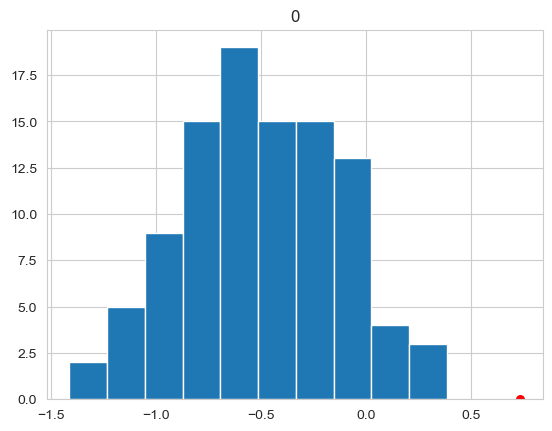

In [118]:
diff_arr = pd.DataFrame(diff_arr)
diff_arr.hist()
plt.scatter(observed_diff,0,color = 'red',s = 30)
plt.show()